
## **Network Analysis**

### **Core Concept Integration**
Network analysis bridges relational data (stored in tables) with graph theory. This synergy enables:
- **Structural Analysis**: Identify hubs, bottlenecks, and connectivity patterns
- **Dynamic Modeling**: Simulate information flow or cascade effects
- **Metric Computation**: Quantify influence through centrality measures

In [16]:
import warnings
warnings.filterwarnings('ignore')

In [1]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# Create meaningful transactional data
relationships = pd.DataFrame({
    'source': ['A', 'B', 'C', 'D', 'A', 'E', 'B', 'F'],
    'target': ['B', 'C', 'D', 'A', 'E', 'F', 'F', 'D'],
    'weight': [3, 2, 5, 1, 4, 3, 2, 4]  # Transaction frequency/strength
})

# Construct directed graph with attributes
G = nx.from_pandas_edgelist(
    relationships, 
    source='source', 
    target='target',
    edge_attr='weight',
    create_using=nx.DiGraph()
)

# Add isolated nodes not in edge list
G.add_nodes_from(['G', 'H'])  # Unconnected entities


### **Key Analysis Techniques**
**1. Centrality Metrics (Directed Graph Version):**

In [2]:
# Degree Centrality (Normalized)
in_degree = nx.in_degree_centrality(G)  # Popularity reception
out_degree = nx.out_degree_centrality(G)  # Influence dispersion

# Betweenness Centrality
betweenness = nx.betweenness_centrality(G, weight='weight')

print(f"In-Degree Centrality: {in_degree}\nBetweenness: {betweenness}")



In-Degree Centrality: {'A': 0.14285714285714285, 'B': 0.14285714285714285, 'C': 0.14285714285714285, 'D': 0.2857142857142857, 'E': 0.14285714285714285, 'F': 0.2857142857142857, 'G': 0.0, 'H': 0.0}
Betweenness: {'A': 0.30952380952380953, 'B': 0.19047619047619047, 'C': 0.0, 'D': 0.30952380952380953, 'E': 0.0, 'F': 0.19047619047619047, 'G': 0.0, 'H': 0.0}



**2. Adjacency Matrix Representation:**


In [3]:
adj_matrix = nx.to_pandas_adjacency(G, weight='weight')
print("\nWeighted Adjacency Matrix:\n", adj_matrix)



Weighted Adjacency Matrix:
      A    B    C    D    E    F    G    H
A  0.0  3.0  0.0  0.0  4.0  0.0  0.0  0.0
B  0.0  0.0  2.0  0.0  0.0  2.0  0.0  0.0
C  0.0  0.0  0.0  5.0  0.0  0.0  0.0  0.0
D  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
E  0.0  0.0  0.0  0.0  0.0  3.0  0.0  0.0
F  0.0  0.0  0.0  4.0  0.0  0.0  0.0  0.0
G  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
H  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0


**3. Advanced Visualization:**


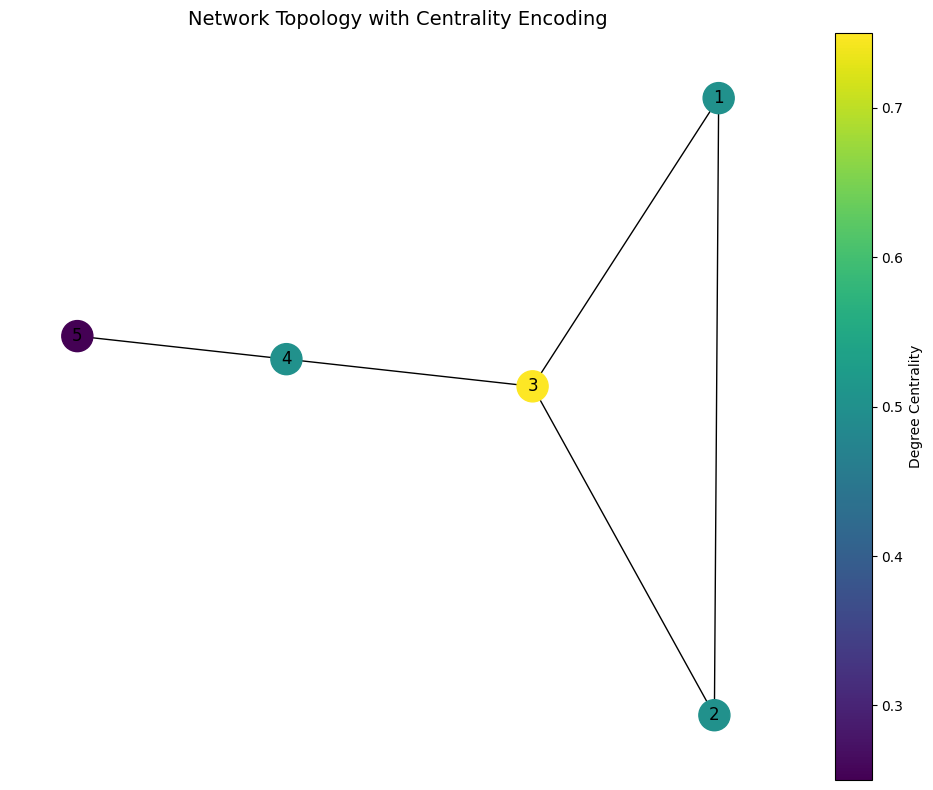

In [9]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

# Create figure and axis objects
fig, ax = plt.subplots(figsize=(10, 8))

# Create and populate the graph
G = nx.Graph()
G.add_edges_from([(1,2), (1,3), (2,3), (3,4), (4,5)])

# Calculate degree centrality
centrality = nx.degree_centrality(G)

# Create visualization
pos = nx.spring_layout(G)
nodes = nx.draw_networkx_nodes(G, pos, 
                             node_color=list(centrality.values()),
                             node_size=500,
                             cmap=plt.cm.viridis,
                             ax=ax)

nx.draw_networkx_edges(G, pos, ax=ax)
nx.draw_networkx_labels(G, pos, font_size=12)

plt.colorbar(nodes, label='Degree Centrality')
ax.set_title("Network Topology with Centrality Encoding", fontsize=14)
ax.axis('off')

plt.tight_layout()
plt.show()

The color gradient from purple to yellow encodes degree centrality, indicating each node's relative importance based on its number of connections.


### **Interpretation Framework**
- **Node Size**: Proportional to betweenness centrality (bridge nodes)
- **Node Color**: Indicates in-degree centrality (popularity)
- **Edge Width**: Reflects relationship strength/weight

### **Performance Considerations**
| Operation          | Time Complexity | Space Complexity | pandas Integration |
|---------------------|-----------------|------------------|---------------------|
| Graph Construction | O(E)            | O(N + E)         | Direct edge list conversion |
| Centrality Calc     | O(N^3)*         | O(N)             | Series ↔ Graph metrics |
| Matrix Conversion   | O(N^2)          | O(N^2)           | Native adjacency support |

Betweenness centrality using Brandes' algorithm: O(NE) for unweighted, O(NE + N²logN) for weighted

### **Real-World Applications**
1. **Financial Networks**: Transaction flow analysis
2. **Supply Chains**: Bottleneck identification
3. **Social Networks**: Influence maximization

### **Temporal Networks**

C:\Users\Dilet\AppData\Local\Temp\ipykernel_8888\1415323432.py:35: DeprecationWarning: `alltrue` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `all` instead.
  nx.draw_networkx_edges(G, pos, ax=axes[idx], width=2)


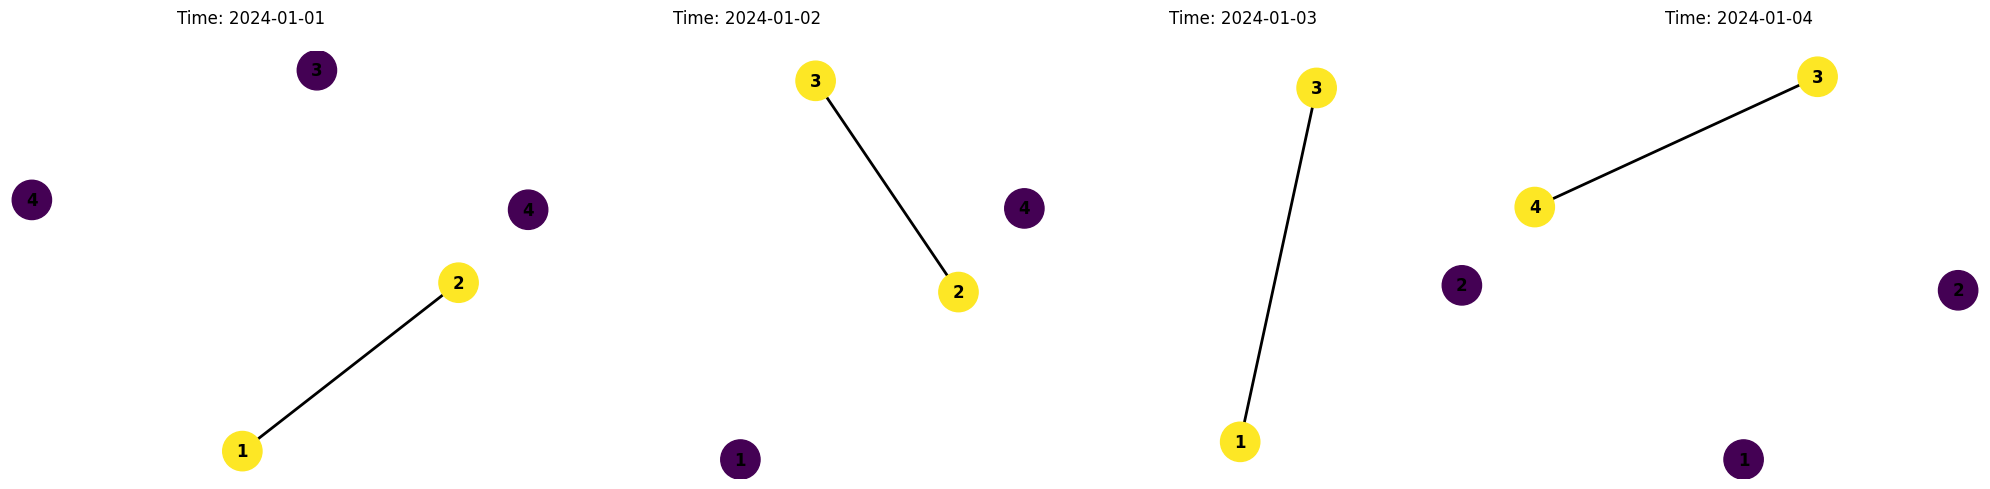

In [13]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd

# Create sample data
time_edges = pd.DataFrame({
    'source': [1, 2, 1, 3],
    'target': [2, 3, 3, 4],
    'timestamp': ['2024-01-01', '2024-01-02', '2024-01-03', '2024-01-04']
})

# Create base graph for consistent layout
all_nodes = set(time_edges['source'].unique()) | set(time_edges['target'].unique())
base_graph = nx.Graph()
base_graph.add_nodes_from(all_nodes)
pos = nx.spring_layout(base_graph, k=2, iterations=50)

# Plot snapshots
timestamps = time_edges['timestamp'].unique()
fig, axes = plt.subplots(1, len(timestamps), figsize=(20, 5))

for idx, time in enumerate(timestamps):
    current_edges = time_edges[time_edges['timestamp'] == time]
    G = nx.from_pandas_edgelist(current_edges, 'source', 'target')
    
    # Add missing nodes to maintain consistency
    G.add_nodes_from(all_nodes)
    
    centrality = nx.degree_centrality(G)
    nodes = nx.draw_networkx_nodes(G, pos, 
                                 node_color=[centrality.get(n, 0) for n in G.nodes()],
                                 node_size=800,
                                 cmap=plt.cm.viridis,
                                 ax=axes[idx])
    nx.draw_networkx_edges(G, pos, ax=axes[idx], width=2)
    nx.draw_networkx_labels(G, pos, ax=axes[idx], font_size=12, font_weight='bold')
    
    axes[idx].set_title(f'Time: {time}', pad=20, fontsize=12)
    axes[idx].axis('off')

plt.tight_layout()
plt.show()

The temporal network visualization shows relationship evolution over 4 days:

1. Day 1: Single edge between nodes 1 and 2
2. Day 2: New connection forms between nodes 2 and 3
3. Day 3: Edge between nodes 1 and 3 appears
4. Day 4: Final connection forms between nodes 3 and 4

Node 3 emerges as a central hub (yellow color) by gaining multiple connections over time, while other nodes maintain fewer connections (purple). This suggests increasing network centralization around node 3.

# Network Metrics Definitions and Interpretations

## NODE METRICS

### Degree Measures
- **In-degree**: Number of incoming connections to a node
- **Out-degree**: Number of outgoing connections from a node
- **Total degree**: Total number of connections (in + out) for a node
- **Weighted in-degree**: Sum of weights of incoming connections
- **Weighted out-degree**: Sum of weights of outgoing connections

### Centrality Measures
- **Betweenness centrality**: 
  - Definition: Proportion of shortest paths between all node pairs that pass through a given node
  - Range: [0,1] where 1 means all shortest paths pass through the node
  - Importance: Identifies bridging nodes and bottlenecks in the network

- **Closeness centrality**: 
  - Definition: Inverse of the average shortest path length from a node to all other nodes
  - Range: [0,1] where 1 means directly connected to all nodes
  - Importance: Measures how quickly a node can reach all other nodes

- **Eigenvector centrality**: 
  - Definition: Measure of node importance based on the importance of its neighbors
  - Range: [0,1] where higher values indicate connection to other important nodes
  - Importance: Identifies influential nodes connected to other influential nodes

- **PageRank**: 
  - Definition: Probability of reaching a node in a random walk on the network
  - Range: [0,1] with sum across all nodes = 1
  - Importance: Measures node importance considering both quantity and quality of connections

- **Katz centrality**: 
  - Definition: Similar to eigenvector centrality but includes paths of all lengths
  - Range: Typically normalized to [0,1]
  - Importance: More robust than eigenvector centrality for directed networks

- **Clustering coefficient**: 
  - Definition: Proportion of possible triangles through a node that exist
  - Range: [0,1] where 1 means all neighbors are connected
  - Importance: Measures local density around nodes

## NETWORK METRICS

### Basic Structural Measures
- **Density**: 
  - Definition: Proportion of possible connections that actually exist
  - Range: [0,1] where 1 means all possible connections exist
  - Importance: Measures overall network connectivity

- **Diameter**: 
  - Definition: Length of the longest shortest path between any two nodes
  - Range: ≥ 1 (integers)
  - Importance: Measures network span

- **Radius**: 
  - Definition: Minimum eccentricity among all nodes
  - Range: ≥ 1 (integers)
  - Importance: Measures network compactness

- **Average clustering**: 
  - Definition: Mean of all nodes' clustering coefficients
  - Range: [0,1]
  - Importance: Measures overall tendency to form clusters

- **Average shortest path length**: 
  - Definition: Mean of all shortest paths between all node pairs
  - Range: ≥ 1
  - Importance: Measures typical separation between nodes

### Connectivity Measures
- **Strong connectivity**: All nodes can reach all others following edge directions
- **Weak connectivity**: All nodes can reach all others ignoring edge directions
- **Number of components**: Number of disconnected subgraphs
- **Reciprocity**: Proportion of mutual connections in directed networks

## COMMUNITY METRICS

- **Modularity**: 
  - Definition: Strength of division into communities
  - Range: [-0.5,1] where > 0.3 indicates significant community structure
  - Importance: Measures quality of community detection

- **Number of communities**: 
  - Definition: Count of detected communities
  - Importance: Indicates network subdivision level

## SIMILARITY METRICS

- **Common neighbors**: 
  - Definition: Number of shared neighbors between two nodes
  - Importance: Basic measure of node similarity

- **Jaccard coefficient**: 
  - Definition: Ratio of common neighbors to total neighbors
  - Range: [0,1]
  - Importance: Normalized measure of neighborhood overlap

- **Preferential attachment**: 
  - Definition: Product of node degrees
  - Importance: Predicts likelihood of future connection

## STRUCTURAL PROPERTIES

- **Degree assortativity**: 
  - Definition: Correlation between degrees of connected nodes
  - Range: [-1,1] where positive means similar degrees tend to connect
  - Importance: Measures degree mixing patterns

- **Transitivity**: 
  - Definition: Proportion of connected triads that form triangles
  - Range: [0,1]
  - Importance: Global measure of clustering

- **Small-world coefficient**: 
  - Definition: Ratio of clustering and path length compared to random network
  - Range: > 1 indicates small-world properties
  - Importance: Measures small-world characteristics



In [19]:
import networkx as nx
import numpy as np
from collections import defaultdict

def create_sample_directed_network():
    # Start with a directed cycle to ensure basic connectivity
    G = nx.cycle_graph(20, create_using=nx.DiGraph())
    
    # Add additional random edges for more complex structure
    num_extra_edges = 40
    nodes = list(G.nodes())
    for _ in range(num_extra_edges):
        u = np.random.choice(nodes)
        v = np.random.choice(nodes)
        if u != v and not G.has_edge(u, v):  # Avoid self-loops and duplicate edges
            G.add_edge(u, v)
    
    # Add weights to all edges
    for (u, v) in G.edges():
        G[u][v]['weight'] = np.random.random()
    
    return G

def calculate_node_metrics(G):
    metrics = defaultdict(dict)
    
    # Degree metrics
    metrics['in_degree'] = dict(G.in_degree())
    metrics['out_degree'] = dict(G.out_degree())
    metrics['total_degree'] = dict(G.degree())
    metrics['weighted_in_degree'] = dict(G.in_degree(weight='weight'))
    metrics['weighted_out_degree'] = dict(G.out_degree(weight='weight'))
    
    # Centrality metrics
    metrics['betweenness_centrality'] = nx.betweenness_centrality(G)
    metrics['closeness_centrality'] = nx.closeness_centrality(G)
    try:
        metrics['eigenvector_centrality'] = nx.eigenvector_centrality(G)
    except:
        metrics['eigenvector_centrality'] = "Not convergent"
    metrics['pagerank'] = nx.pagerank(G)
    try:
        metrics['katz_centrality'] = nx.katz_centrality(G)
    except:
        metrics['katz_centrality'] = "Not convergent"
    
    # Clustering
    metrics['clustering_coefficient'] = nx.clustering(G)
    
    return metrics

def calculate_network_metrics(G):
    metrics = {}
    
    # Basic metrics
    metrics['density'] = nx.density(G)
    try:
        metrics['diameter'] = nx.diameter(G)
        metrics['radius'] = nx.radius(G)
    except:
        metrics['diameter'] = "Graph is not strongly connected"
        metrics['radius'] = "Graph is not strongly connected"
    
    metrics['average_clustering'] = nx.average_clustering(G)
    try:
        metrics['average_shortest_path_length'] = nx.average_shortest_path_length(G)
    except:
        metrics['average_shortest_path_length'] = "Graph is not strongly connected"
    
    metrics['average_in_degree'] = sum(dict(G.in_degree()).values()) / G.number_of_nodes()
    metrics['average_out_degree'] = sum(dict(G.out_degree()).values()) / G.number_of_nodes()
    
    # Connectivity
    metrics['is_strongly_connected'] = nx.is_strongly_connected(G)
    metrics['is_weakly_connected'] = nx.is_weakly_connected(G)
    metrics['number_strongly_connected_components'] = nx.number_strongly_connected_components(G)
    metrics['number_weakly_connected_components'] = nx.number_weakly_connected_components(G)
    
    # Reciprocity
    metrics['reciprocity'] = nx.reciprocity(G)
    
    return metrics

def calculate_community_metrics(G):
    metrics = {}
    
    # Convert to undirected for community detection
    G_undirected = G.to_undirected()
    
    # Community detection using Louvain method
    communities = nx.community.louvain_communities(G_undirected)
    
    # Modularity
    metrics['modularity'] = nx.community.modularity(G_undirected, communities)
    
    # Number of communities
    metrics['number_of_communities'] = len(communities)
    
    return metrics

def calculate_similarity_metrics(G):
    metrics = defaultdict(dict)
    
    # Calculate similarity measures for a sample of node pairs
    nodes = list(G.nodes())
    sample_pairs = [(nodes[i], nodes[i+1]) for i in range(len(nodes)-1)]
    
    # Convert to undirected for some metrics
    G_undirected = G.to_undirected()
    
    for u, v in sample_pairs:
        # Common neighbors
        metrics['common_neighbors'][(u,v)] = len(list(nx.common_neighbors(G_undirected, u, v)))
        
        # Jaccard coefficient
        metrics['jaccard'][(u,v)] = list(nx.jaccard_coefficient(G_undirected, [(u,v)]))[0][2]
        
        # Preferential attachment
        metrics['preferential_attachment'][(u,v)] = list(nx.preferential_attachment(G_undirected, [(u,v)]))[0][2]
    
    return metrics

def calculate_structural_properties(G):
    metrics = {}
    
    # Remove self-loops for calculations
    G_no_loops = G.copy()
    G_no_loops.remove_edges_from(nx.selfloop_edges(G_no_loops))
    G_undirected = G_no_loops.to_undirected()
    
    try:
        # Assortativity
        metrics['in_degree_assortativity'] = nx.degree_assortativity_coefficient(G_no_loops, x='in', y='in')
        metrics['out_degree_assortativity'] = nx.degree_assortativity_coefficient(G_no_loops, x='out', y='out')
    except:
        metrics['in_degree_assortativity'] = "Not computable"
        metrics['out_degree_assortativity'] = "Not computable"
    
    # Network structure metrics
    metrics['number_of_selfloops'] = nx.number_of_selfloops(G)
    metrics['number_of_edges'] = G.number_of_edges()
    metrics['number_of_nodes'] = G.number_of_nodes()
    
    try:
        # Transitivity (alternative to rich-club coefficient)
        metrics['transitivity'] = nx.transitivity(G_undirected)
    except:
        metrics['transitivity'] = "Not computable"
    
    try:
        # Approximate small-world coefficient
        random_G = nx.erdos_renyi_graph(G_undirected.number_of_nodes(), 
                                      nx.density(G_undirected), 
                                      directed=False)
        clustering_ratio = nx.average_clustering(G_undirected) / nx.average_clustering(random_G)
        
        # Use average shortest path length only if the graph is connected
        if nx.is_connected(G_undirected) and nx.is_connected(random_G):
            path_ratio = nx.average_shortest_path_length(G_undirected) / nx.average_shortest_path_length(random_G)
            metrics['small_world_coefficient'] = clustering_ratio / path_ratio
        else:
            metrics['small_world_coefficient'] = "Graph is not connected"
    except:
        metrics['small_world_coefficient'] = "Not computable"
    
    return metrics

def analyze_network():
    G = create_sample_directed_network()
    
    print("NETWORK ANALYSIS")
    print("\n1. NODE METRICS")
    node_metrics = calculate_node_metrics(G)
    for metric_name, values in node_metrics.items():
        print(f"\n{metric_name}:")
        # Print only first 3 nodes for brevity
        for node, value in list(values.items())[:3]:
            print(f"Node {node}: {value:.4f}" if isinstance(value, float) else f"Node {node}: {value}")
    
    print("\n2. NETWORK METRICS")
    network_metrics = calculate_network_metrics(G)
    for metric_name, value in network_metrics.items():
        print(f"{metric_name}: {value}")
    
    print("\n3. COMMUNITY METRICS")
    community_metrics = calculate_community_metrics(G)
    for metric_name, value in community_metrics.items():
        print(f"{metric_name}: {value}")
    
    print("\n4. SIMILARITY METRICS")
    similarity_metrics = calculate_similarity_metrics(G)
    # Print only first node pair for brevity
    for metric_name, values in similarity_metrics.items():
        first_pair = list(values.items())[0]
        print(f"{metric_name} for pair {first_pair[0]}: {first_pair[1]}")
    
    print("\n5. STRUCTURAL PROPERTIES")
    structural_metrics = calculate_structural_properties(G)
    for metric_name, value in structural_metrics.items():
        if isinstance(value, dict):
            print(f"{metric_name}: {list(value.items())[:3]}")  # Show only first 3 values
        else:
            print(f"{metric_name}: {value}")

if __name__ == "__main__":
    analyze_network()

NETWORK ANALYSIS

1. NODE METRICS

in_degree:
Node 0: 1
Node 1: 1
Node 2: 1

out_degree:
Node 0: 3
Node 1: 4
Node 2: 2

total_degree:
Node 0: 4
Node 1: 5
Node 2: 3

weighted_in_degree:
Node 0: 0.1794
Node 1: 0.4506
Node 2: 0.5820

weighted_out_degree:
Node 0: 0.7228
Node 1: 2.4490
Node 2: 0.4733

betweenness_centrality:
Node 0: 0.1764
Node 1: 0.1040
Node 2: 0.0231

closeness_centrality:
Node 0: 0.2603
Node 1: 0.2159
Node 2: 0.1845

eigenvector_centrality:
Node 0: 0.0542
Node 1: 0.0208
Node 2: 0.0080

pagerank:
Node 0: 0.0224
Node 1: 0.0194
Node 2: 0.0114

katz_centrality:
Node 0: 0.1843
Node 1: 0.1820
Node 2: 0.1817

clustering_coefficient:
Node 0: 0
Node 1: 0.0500
Node 2: 0

2. NETWORK METRICS
density: 0.1394736842105263
diameter: 8
radius: 3
average_clustering: 0.08226190476190477
average_shortest_path_length: 3.018421052631579
average_in_degree: 2.65
average_out_degree: 2.65
is_strongly_connected: True
is_weakly_connected: True
number_strongly_connected_components: 1
number_weakly_c

## Network Values Interpretation

For our specific network (n=20 nodes, 53 edges):
- Low density (0.139) indicates a sparse network
- Moderate modularity (0.331) shows clear community structure
- Low reciprocity (0.113) suggests hierarchical relationships
- Small-world coefficient < 1 (0.604) indicates not a strong small-world network
- Positive in-degree but negative out-degree assortativity suggests complex mixing patterns

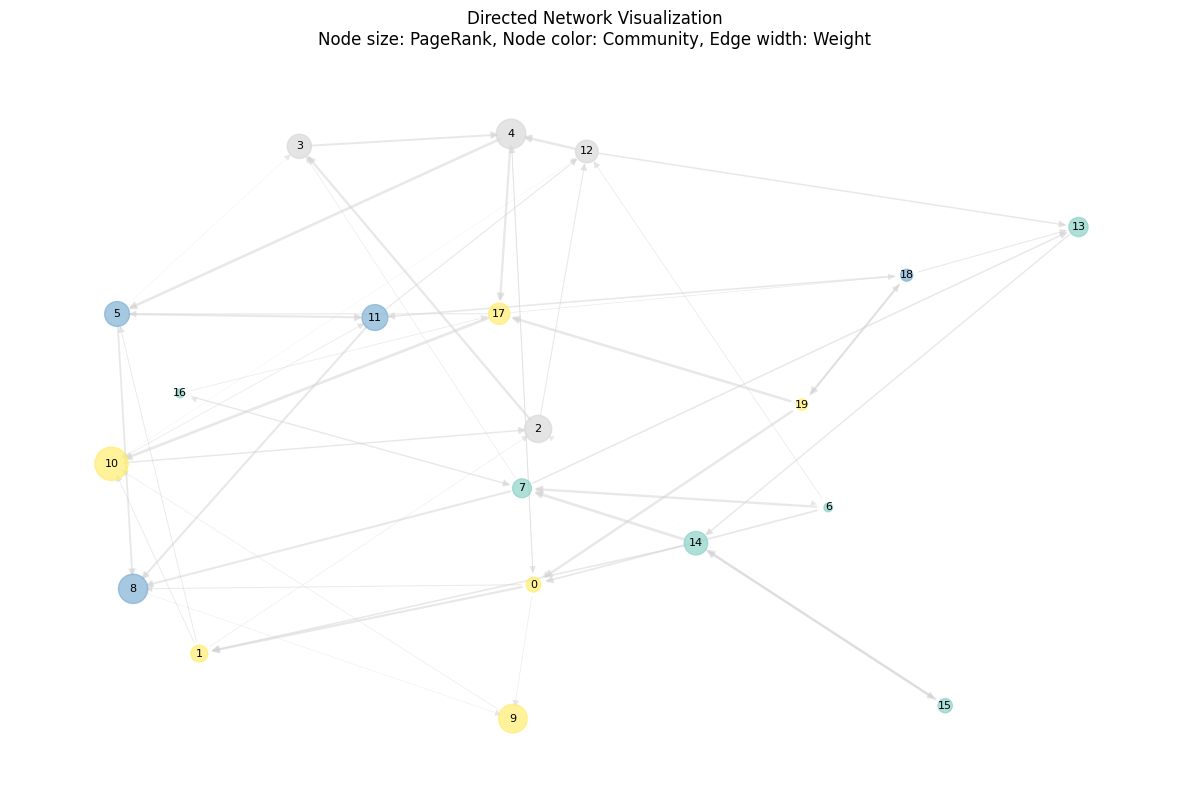

In [20]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

def create_and_visualize_network():
    # Create the network
    G = nx.cycle_graph(20, create_using=nx.DiGraph())
    
    # Add additional random edges
    num_extra_edges = 40
    nodes = list(G.nodes())
    for _ in range(num_extra_edges):
        u = np.random.choice(nodes)
        v = np.random.choice(nodes)
        if u != v and not G.has_edge(u, v):
            G.add_edge(u, v)
    
    # Add weights to edges
    for (u, v) in G.edges():
        G[u][v]['weight'] = np.random.random()
    
    # Calculate node properties for visualization
    pagerank = nx.pagerank(G)
    communities = nx.community.louvain_communities(G.to_undirected())
    
    # Create community dictionary for node colors
    community_dict = {}
    for i, community in enumerate(communities):
        for node in community:
            community_dict[node] = i
    
    # Set up the plot
    plt.figure(figsize=(12, 8))
    
    # Use spring layout with adjusted parameters
    pos = nx.spring_layout(G, k=1, iterations=50)
    
    # Draw edges with width based on weight
    edges = G.edges()
    weights = [G[u][v]['weight'] * 2 for (u, v) in edges]
    nx.draw_networkx_edges(G, pos, edge_color='lightgray', 
                          width=weights, alpha=0.5, 
                          arrowsize=10)
    
    # Draw nodes with size based on PageRank and color based on community
    node_sizes = [pagerank[node] * 5000 for node in G.nodes()]
    node_colors = [community_dict[node] for node in G.nodes()]
    nx.draw_networkx_nodes(G, pos, node_size=node_sizes,
                          node_color=node_colors, 
                          cmap=plt.cm.Set3,
                          alpha=0.7)
    
    # Add labels
    nx.draw_networkx_labels(G, pos, font_size=8)
    
    # Add title and remove axes
    plt.title("Directed Network Visualization\nNode size: PageRank, Node color: Community, Edge width: Weight", 
              pad=20, fontsize=12)
    plt.axis('off')
    
    # Show plot
    plt.tight_layout()
    plt.show()

# Create and show the visualization
create_and_visualize_network()